Bioinformatics Project


In [7]:
import pandas as pd

In [8]:
#Read in/Cleanup Files

#Load in 23 and me file and skip bad line
df23 = pd.read_csv(
    "23andme_v5_hg19_ref.txt.gz",
    sep="\t",
    comment="#",
    header = None,
    skiprows=[1458])

df23.columns = ["chrom", "pos", "rsid", "allele_23andme"]
df23


,chrom,pos,rsid,allele_23andme
0,chr1,69869,rs548049170,T
1,chr1,74792,rs13328684,G
2,chr1,565508,rs9283150,G
3,chr1,726912,i713426,A
4,chr1,727841,rs116587930,G
...,...,...,...,...
638457,chrM,16524,i4000693,A
638458,chrM,16524,i704756,A
638459,chrM,16525,i705255,A
638460,chrM,16526,i4000757,G


In [22]:
#Load in PharmGKB file 
pharmdf = pd.read_csv("var_drug_ann.tsv", sep="\t", dtype=str, on_bad_lines='skip')

# Keep only rows where Variant/Haplotypes starts with "rs"
pharm_rs = pharmdf[pharmdf["Variant/Haplotypes"].str.startswith("rs", na=False)].copy()

pharm_rs.head()

,Variant Annotation ID,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles,...,isPlural,Is/Is Not associated,Direction of effect,PD/PK terms,Multiple drugs And/or,Population types,Population Phenotypes or diseases,Multiple phenotypes or diseases And/or,Comparison Allele(s) or Genotype(s),Comparison Metabolizer types
1,1453073660,rs2909451,DPP4,sitagliptin,39792745,Efficacy,yes,"""Patients with the rs2909451 TT genotype in th...",Genotype TT is associated with decreased respo...,TT,...,Is,Associated with,decreased,response to,NaN,in people with,"Other:Diabetes Mellitus, Type 2",NaN,NaN,NaN
2,1453071582,rs706795,FAIM2,"citalopram, escitalopram, fluoxetine, fluvoxam...",40054571,Efficacy,no,"""We observed nominally significant association...",Allele T is associated with increased response...,T,...,Is,Associated with,increased,response to,or,in people with,Other:Obsessive-Compulsive Disorder,NaN,C,NaN
3,1451138786,rs16918842,OPRK1,heroin,31940240,Dosage,no,No significant difference in allele or genotyp...,Allele T is not associated with dose of heroin...,T,...,Is,Not associated with,NaN,dose of,NaN,in people with,Other:Heroin Dependence,NaN,C,NaN
5,1453075980,rs2285676,KCNJ11,sitagliptin,39792745,Efficacy,yes,"""For KCNJ11 gene polymorphisms, patients with ...",Genotype GG is associated with increased respo...,GG,...,Is,Associated with,increased,response to,NaN,in people with,"Other:Diabetes Mellitus, Type 2",NaN,NaN,NaN
7,1453075960,rs163184,KCNQ1,sitagliptin,39792745,Efficacy,yes,"""KCNQ1 gene polymorphisms also significantly a...",Genotype GG is associated with decreased respo...,GG,...,Is,Associated with,decreased,response to,NaN,in people with,"Other:Diabetes Mellitus, Type 2",NaN,NaN,NaN


1. Map/merge the 23andme file and the variant-drug annotation file based on dbSNP_ID (also known as rsID).



In [10]:
#Merge 23andMe with PharmGKB on rsID 
merged = df23.merge(
    pharm_rs,
    left_on="rsid",
    right_on="Variant/Haplotypes",
    how="inner"
)

#Final columns for merged data
final_cols = {
    "rsid": "dbSNP_ID",
    "Gene": "GENE_SYMBOL",
    "Drug(s)": "DRUG_NAME",
    "PMID": "PMID",
    "Phenotype Category": "PHENOTYPE_CATEGORY",
    "Significance": "SIGNIFICANCE",
    "Notes": "NOTES",
    "Sentence": "SENTENCE",
    "Alleles": "ALLELE_PharmGKB",
    "allele_23andme": "ALLELE_23andme"
}

final_df = merged[list(final_cols.keys())].rename(columns=final_cols)

#Save the merged, annotated file for future use
final_df.to_csv("23andme_pharmgkb_merged.csv", index=False)

final_df

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
0,rs2651899,PRDM16,Selective serotonin (5HT1) agonists,26502740,Efficacy,yes,"""Hence, the following risk alleles were determ...",Allele C is associated with increased response...,C,T
1,rs11807862,PRDM16,"atorvastatin, HMG-CoA reductase inhibitors, si...",24096969,Efficacy,no,There could be strand confusion with this A/T ...,Genotype AA is associated with decreased respo...,AA,T
2,rs228729,PER3,lithium,21781277,Efficacy,no,NaN,Allele T is not associated with increased resp...,T,T
3,rs228642,PER3,lithium,21781277,Efficacy,no,NaN,Allele C is not associated with increased resp...,C,C
4,rs228666,PER3,lithium,21781277,Efficacy,no,NaN,Allele C is not associated with increased resp...,C,T
...,...,...,...,...,...,...,...,...,...,...
6115,rs3810651,GABRQ,botulinum toxin type a,31014225,Efficacy,no,No significant difference in allele frequency ...,Allele T is not associated with response to bo...,T,T
6116,rs17435,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,T
6117,rs1734787,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A
6118,rs1734791,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A


2. Filter the output so that it only contains significant associations (SIGNIFICANCE is yes) for variants that affect the drug efficacy (`PHENOTYPE_CATEGORY` is `efficacy`).

In [11]:
#Filtering rows to keep only samples with 'Significanace' == 'yes' and 'phenotype_category' == 'Efficacy'
filtered_df = final_df[(final_df['PHENOTYPE_CATEGORY'] == 'Efficacy') & (final_df['SIGNIFICANCE'] == 'yes')] #Selection code
filtered_df

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,PMID,PHENOTYPE_CATEGORY,SIGNIFICANCE,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
0,rs2651899,PRDM16,Selective serotonin (5HT1) agonists,26502740,Efficacy,yes,"""Hence, the following risk alleles were determ...",Allele C is associated with increased response...,C,T
9,rs1801131,MTHFR,oxaliplatin,20385995,Efficacy,yes,Statistics given as trend for increased overal...,Genotypes GG + GT are associated with increase...,GG + GT,T
11,rs1801131,MTHFR,"Vitamin B-complex, Incl. Combinations",27035272,Efficacy,yes,Please note that allele has been complemented ...,Allele G is associated with increased response...,G,T
14,rs1801131,MTHFR,"fluorouracil, leucovorin, oxaliplatin",20078613,Efficacy,yes,NaN,Allele G is associated with increased response...,G,T
17,rs1801131,MTHFR,methotrexate,24386571,Efficacy,yes,Patients with the TT genotype had significantl...,Genotype TT is associated with decreased respo...,TT,T
...,...,...,...,...,...,...,...,...,...,...
6111,rs502434,GRIA3,"Selective serotonin reuptake inhibitors, venla...",23394390,Efficacy,yes,Regression model looking at interaction betwee...,Genotype CC is associated with decreased respo...,CC,T
6114,rs3810651,GABRQ,venlafaxine,23394390,Efficacy,yes,Those with the AA/AT genotype are more likely ...,Genotypes AA + AT are associated with increase...,AA + AT,T
6116,rs17435,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,T
6117,rs1734787,MECP2,"cisplatin, fluorouracil, mitoxantrone",21635146,Efficacy,yes,The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A


3. Save the output of the filtering step in a tab-separated file (23andme_PharmGKB_map.tsv) with the following columns:
dbSNP_ID, GENE_SYMBOL, DRUG_NAME, NOTES, SENTENCE, ALLELE_PharmGKB, ALLELE_23andme


In [12]:
#Required final columns
final_cols_list = [
    'dbSNP_ID', 
    'GENE_SYMBOL', 
    'DRUG_NAME', 
    'NOTES', 
    'SENTENCE', 
    'ALLELE_PharmGKB', 
    'ALLELE_23andme'
]

#Selecting only those columns from the filtered data
final_output_df = filtered_df[final_cols_list]
final_output_df

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
0,rs2651899,PRDM16,Selective serotonin (5HT1) agonists,"""Hence, the following risk alleles were determ...",Allele C is associated with increased response...,C,T
9,rs1801131,MTHFR,oxaliplatin,Statistics given as trend for increased overal...,Genotypes GG + GT are associated with increase...,GG + GT,T
11,rs1801131,MTHFR,"Vitamin B-complex, Incl. Combinations",Please note that allele has been complemented ...,Allele G is associated with increased response...,G,T
14,rs1801131,MTHFR,"fluorouracil, leucovorin, oxaliplatin",NaN,Allele G is associated with increased response...,G,T
17,rs1801131,MTHFR,methotrexate,Patients with the TT genotype had significantl...,Genotype TT is associated with decreased respo...,TT,T
...,...,...,...,...,...,...,...
6111,rs502434,GRIA3,"Selective serotonin reuptake inhibitors, venla...",Regression model looking at interaction betwee...,Genotype CC is associated with decreased respo...,CC,T
6114,rs3810651,GABRQ,venlafaxine,Those with the AA/AT genotype are more likely ...,Genotypes AA + AT are associated with increase...,AA + AT,T
6116,rs17435,MECP2,"cisplatin, fluorouracil, mitoxantrone",The study described this variant within the ME...,Allele A is associated with response to cispla...,A,T
6117,rs1734787,MECP2,"cisplatin, fluorouracil, mitoxantrone",The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A


In [13]:
#Saving the filtered data into a tsv file
final_output_df.to_csv("23andme_PharmGKB_map.tsv", index=False, sep='\t')
final_output_df

,dbSNP_ID,GENE_SYMBOL,DRUG_NAME,NOTES,SENTENCE,ALLELE_PharmGKB,ALLELE_23andme
0,rs2651899,PRDM16,Selective serotonin (5HT1) agonists,"""Hence, the following risk alleles were determ...",Allele C is associated with increased response...,C,T
9,rs1801131,MTHFR,oxaliplatin,Statistics given as trend for increased overal...,Genotypes GG + GT are associated with increase...,GG + GT,T
11,rs1801131,MTHFR,"Vitamin B-complex, Incl. Combinations",Please note that allele has been complemented ...,Allele G is associated with increased response...,G,T
14,rs1801131,MTHFR,"fluorouracil, leucovorin, oxaliplatin",NaN,Allele G is associated with increased response...,G,T
17,rs1801131,MTHFR,methotrexate,Patients with the TT genotype had significantl...,Genotype TT is associated with decreased respo...,TT,T
...,...,...,...,...,...,...,...
6111,rs502434,GRIA3,"Selective serotonin reuptake inhibitors, venla...",Regression model looking at interaction betwee...,Genotype CC is associated with decreased respo...,CC,T
6114,rs3810651,GABRQ,venlafaxine,Those with the AA/AT genotype are more likely ...,Genotypes AA + AT are associated with increase...,AA + AT,T
6116,rs17435,MECP2,"cisplatin, fluorouracil, mitoxantrone",The study described this variant within the ME...,Allele A is associated with response to cispla...,A,T
6117,rs1734787,MECP2,"cisplatin, fluorouracil, mitoxantrone",The study described this variant within the ME...,Allele A is associated with response to cispla...,A,A


4. Create a tab separated file (23andme_PharmGKB_summary.tsv) with summarized data with the following columns:

GENE_SYMBOL, DRUG_NAME, dbSNP_IDs (list of IDs separated by ";")

In [14]:
summary_df = (final_output_df[['GENE_SYMBOL', 'DRUG_NAME', 'dbSNP_ID']]
              .drop_duplicates()
              .groupby(['GENE_SYMBOL', 'DRUG_NAME'])
              .agg(dbSNP_IDs=('dbSNP_ID', ';'.join))
              .reset_index())

#Check the first few rows  
summary_df.head()

# Save in the required tab seperated file
summary_df.to_csv("23andme_PharmGKB_summary.tsv", index=False, sep='\t')


,GENE_SYMBOL,DRUG_NAME,dbSNP_IDs
0,ABCA1,"atorvastatin, rosuvastatin, simvastatin",rs2230806
1,ABCA1,fenofibrate,rs2230808;rs2230806
2,ABCB1,antidepressants,rs1128503
3,ABCB1,antipsychotics,rs1128503
4,ABCB1,carbamazepine,rs1128503


5. Plot the distribution (histogram) of the number of drugs associated with a gene, and the number of SNPs for a gene.

In [15]:
import matplotlib.pyplot as plt

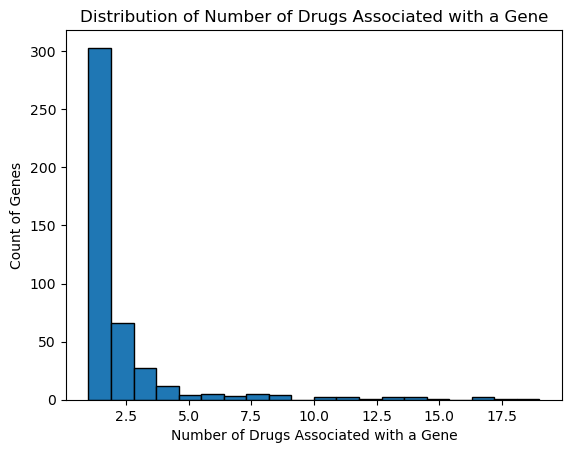

In [21]:
#For each gene, how many drugs it's associated with
#For each gene, how many SNPs

NumberOfDrugsInGene = summary_df.groupby("GENE_SYMBOL")["DRUG_NAME"].nunique()

plt.hist(NumberOfDrugsInGene, bins=20, edgecolor="black")
plt.xlabel("Number of Drugs Associated with a Gene")     
plt.ylabel("Count of Genes")                             
plt.title("Distribution of Number of Drugs Associated with a Gene")
plt.show()


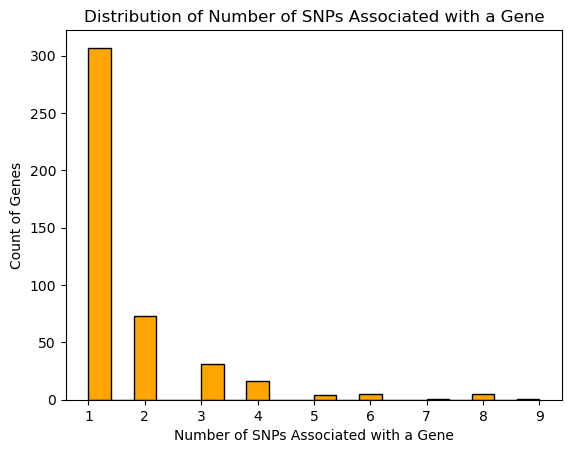

In [20]:
NumberOfSNPsInGene = filtered_df.groupby("GENE_SYMBOL")["dbSNP_ID"].nunique()
plt.hist(NumberOfSNPsInGene, bins=20, edgecolor="black", color='orange')
plt.xlabel("Number of SNPs Associated with a Gene")     
plt.ylabel("Count of Genes")                             
plt.title("Distribution of Number of SNPs Associated with a Gene")
plt.show()

6. New feature

How many of the dbsnp ids from 23andMe report are not present in Variant/Haplotypes annotation file 

In [32]:
rs_23andme = set(df23["rsid"].dropna())
#print(rs_23andme)
rs_pharmgkb = set(pharm_rs["Variant/Haplotypes"].dropna())
#print(rs_pharmgkb)

In [40]:
#rsIDs present in only 23andme report 
ids_only_23andme = rs_23andme - rs_pharmgkb

print("IDs present only in 23andMe:", len(ids_only_23andme))


df_only_23andme = df23[df23["rsid"].isin(ids_only_23andme)][["rsid", "chrom", "pos", "allele_23andme"]]
df_only_23andme

df_only_23andme.to_csv("23andme_unannotated_snps.tsv", index=False, sep='\t')


##These are variants in this individual’s genome that have not yet been studied for drug response according to PharmGKB
#Biologically this is relevant because it shows the gap in pharmacogenomic knowledge for this individual i.e 
#these unannotated SNPs represent variants in genes affecting drug response that either have not yet been studied or
#haven't been reported, thus providing insights into areas for further research

IDs present only in 23andMe: 636589
